In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import HowToBreakIntoTheField as t
%matplotlib inline
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score, mean_squared_error
#import seaborn as sns


df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc
#get_description('Professional')

In [5]:
get_description('StackOverflowSatisfaction')

'Stack Overflow satisfaction'

In [6]:
get_description('SelfTaughtTypes')

"You indicated that you had taught yourself a programming technology without taking a course. What resources did you use to do that? If you've done it more than once, please think about the most recent time you've done so."

In [7]:
df['StackOverflowSatisfaction'].isnull().mean()#0.30
df['SelfTaughtTypes'].isnull().mean()# missing rate: 0.47

0.46743796461103548

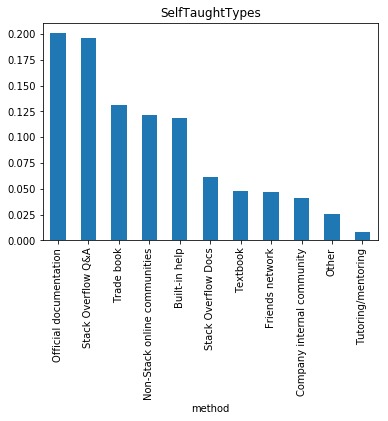

In [8]:
possible_vals = ["Official documentation", "Trade book", 
                 "Stack Overflow Q&A", "Non-Stack online communities", "Built-in help",
                 "Stack Overflow Docs", "Textbook", "Friends network",
                 "Tutoring/mentoring", "Company internal community", "Other"]

def clean_and_plot(df, title='SelfTaughtTypes', plot=True):
    '''
    INPUT 
        df - a dataframe holding the SelfTaughtTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the SelfTaughtTypes column.
    '''
    study = df['SelfTaughtTypes'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'SelfTaughtTypes': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

In [9]:
sub = df[['StackOverflowSatisfaction','SelfTaughtTypes']]
sub_rm = sub.dropna(subset=['StackOverflowSatisfaction','SelfTaughtTypes'], axis=0)
# dataframe with rows for nan satisfaction or SelfTaughtTypes removed
sub_rm.head()

,StackOverflowSatisfaction,SelfTaughtTypes
1,8.0,Official documentation; Stack Overflow Q&A; Other
2,8.0,Official documentation; Trade book; Textbook; ...
5,6.0,Official documentation; Stack Overflow Q&A; No...
6,8.0,Official documentation; Trade book; Textbook; ...
7,7.0,Official documentation; Trade book; Stack Over...


In [10]:
df.StackOverflowSatisfaction.value_counts()

8.0     3916
9.0     3459
10.0    3139
7.0     1858
6.0      588
5.0      301
4.0       71
3.0       58
2.0       34
1.0       16
0.0       12
Name: StackOverflowSatisfaction, dtype: int64

In [11]:
def highstf(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the StackOverflowSatisfaction column
    
    OUTPUT
        return 1 if the string is in ("9.0", "10.0")
        return 0 otherwise
    
    '''
    if formal_ed_str in (9.0,10.0): 
        return 1
    else:
        return 0
sub_rm['Satisfy'] = sub_rm['StackOverflowSatisfaction'].apply(highstf) 
sub_rm

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,StackOverflowSatisfaction,SelfTaughtTypes,Satisfy
1,8.0,Official documentation; Stack Overflow Q&A; Other,0
2,8.0,Official documentation; Trade book; Textbook; ...,0
5,6.0,Official documentation; Stack Overflow Q&A; No...,0
6,8.0,Official documentation; Trade book; Textbook; ...,0
7,7.0,Official documentation; Trade book; Stack Over...,0
9,9.0,Official documentation; Trade book; Non-Stack ...,1
10,10.0,Official documentation; Trade book; Stack Over...,1
13,10.0,Official documentation; Trade book; Stack Over...,1
16,7.0,Official documentation; Trade book; Textbook; ...,0
17,8.0,Official documentation; Stack Overflow Q&A; Other,0


In [12]:
Satify_high = sub_rm[sub_rm['Satisfy'] == 1] # Subset only those with HigherSatisfication of 1
Satify_nhigh = sub_rm[sub_rm['Satisfy'] == 0] # Subset only those without HigherSatisfication of 0

Satify_high_perc = clean_and_plot(Satify_high, plot=False)
Satify_nhigh_perc = clean_and_plot(Satify_nhigh, plot=False)

comp_df = pd.merge(Satify_high_perc, Satify_nhigh_perc, left_index=True, right_index=True)#'
comp_df.columns = ['Satify_high_perc', 'Satify_nothigh_perc']
comp_df['Diff_satisfication'] = comp_df['Satify_high_perc'] - comp_df['Satify_nothigh_perc']
comp_df.style.bar(subset=['Diff_satisfication'], align='mid', color=['#d65f5f', '#5fba7d'])

,Satify_high_perc,Satify_nothigh_perc,Diff_satisfication
method,,,
Stack Overflow Q&A,0.207978,0.187098,0.0208795
Official documentation,0.201197,0.204055,-0.00285754
Trade book,0.131112,0.131174,-6.23671e-05
Non-Stack online communities,0.117445,0.124487,-0.00704206
Built-in help,0.113683,0.125224,-0.0115405
Stack Overflow Docs,0.0651057,0.0546077,0.010498
Friends network,0.0461408,0.0486045,-0.00246372
Textbook,0.0441807,0.0495524,-0.00537165
Company internal community,0.0398898,0.0394945,0.000395342


In [14]:
job_sol_2 = {'The proportion of missing values in the StackOverflowSatisfaction and SelfTaughtTypes column: 0.3 and 0.47',
             'According to SelfTaughtTypes, which groups have the high satisfaction: Stack Overflow Q&A and Stack Overflow Docs',
             'In general, What Self-taught Type can Get Most Help from StackOver? : Referring more Stack Overflow Q&A and Stack Overflow Docs'
             }
print(job_sol_2) 

{'In general, What Self-taught Type can Get Most Help from StackOver? : Referring more Stack Overflow Q&A and Stack Overflow Docs', 'According to SelfTaughtTypes, which groups have the high satisfaction: Stack Overflow Q&A and Stack Overflow Docs', 'The proportion of missing values in the StackOverflowSatisfaction and SelfTaughtTypes column: 0.3 and 0.47'}
